#INMERSION DE DATOS CON PYTHON

#**PROBLEMA DE NEGOCIO**

La importancia de reducir el riesgo crediticio ha llevado a una institución financiera alemana a buscar soluciones innovadoras. Como científicos de datos hemos sido convocados para construir un modelo de machine learning preciso y confiable que sea capaz de evaluar con mayor precisión la probabilidad de incumplimiento crediticio de sus clientes.

#**1. Configuración del Ambiente**

In [2]:
# prompt: importa los siguientes módulos con sus respectivos alias: pandas, matplotlib, seaborn, drive de google colab, warnings

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
import warnings

drive.mount('/content/Drive')
warnings.filterwarnings('ignore')


Mounted at /content/Drive


#**2. Preprocesamiento de datos**

In [3]:
pd.set_option('display.max_columns', None)
global df_banco, resultados

In [4]:
df_banco = pd.read_csv('/content/Drive/MyDrive/Inmersion/german_credit.csv')
df_banco.head()

,default,account_check_status,duration_in_month,credit_history,purpose,credit_amount,savings,present_emp_since,installment_as_income_perc,personal_status_sex,other_debtors,present_res_since,property,age,other_installment_plans,housing,credits_this_bank,job,people_under_maintenance,telephone,foreign_worker
0,0,< 0 DM,6,critical account/ other credits existing (not ...,domestic appliances,1169,unknown/ no savings account,.. >= 7 years,4,male : single,none,4,real estate,67,none,own,2,skilled employee / official,1,"yes, registered under the customers name",yes
1,1,0 <= ... < 200 DM,48,existing credits paid back duly till now,domestic appliances,5951,... < 100 DM,1 <= ... < 4 years,2,female : divorced/separated/married,none,2,real estate,22,none,own,1,skilled employee / official,1,none,yes
2,0,no checking account,12,critical account/ other credits existing (not ...,(vacation - does not exist?),2096,... < 100 DM,4 <= ... < 7 years,2,male : single,none,3,real estate,49,none,own,1,unskilled - resident,2,none,yes
3,0,< 0 DM,42,existing credits paid back duly till now,radio/television,7882,... < 100 DM,4 <= ... < 7 years,2,male : single,guarantor,4,if not A121 : building society savings agreeme...,45,none,for free,1,skilled employee / official,2,none,yes
4,1,< 0 DM,24,delay in paying off in the past,car (new),4870,... < 100 DM,1 <= ... < 4 years,3,male : single,none,4,unknown / no property,53,none,for free,2,skilled employee / official,2,none,yes


In [5]:
df_banco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   default                     1000 non-null   int64 
 1   account_check_status        1000 non-null   object
 2   duration_in_month           1000 non-null   int64 
 3   credit_history              1000 non-null   object
 4   purpose                     1000 non-null   object
 5   credit_amount               1000 non-null   int64 
 6   savings                     1000 non-null   object
 7   present_emp_since           1000 non-null   object
 8   installment_as_income_perc  1000 non-null   int64 
 9   personal_status_sex         1000 non-null   object
 10  other_debtors               1000 non-null   object
 11  present_res_since           1000 non-null   int64 
 12  property                    1000 non-null   object
 13  age                         1000 non-null   int64

In [6]:
df_banco.account_check_status.value_counts()

,count
account_check_status,
no checking account,394
< 0 DM,274
0 <= ... < 200 DM,269
>= 200 DM / salary assignments for at least 1 year,63


In [7]:
columnas = list(df_banco.select_dtypes(include=['object']).columns)
for columna in columnas:
  print(f'El nombre de la columna: {columna}')
  print(list(df_banco[f'{columna}'].value_counts().index))
  print('\n')

El nombre de la columna: account_check_status
['no checking account', '< 0 DM', '0 <= ... < 200 DM', '>= 200 DM / salary assignments for at least 1 year']


El nombre de la columna: credit_history
['existing credits paid back duly till now', 'critical account/ other credits existing (not at this bank)', 'delay in paying off in the past', 'all credits at this bank paid back duly', 'no credits taken/ all credits paid back duly']


El nombre de la columna: purpose
['domestic appliances', 'car (new)', 'radio/television', 'car (used)', 'business', '(vacation - does not exist?)', 'education', 'repairs', 'furniture/equipment', 'retraining']


El nombre de la columna: savings
['... < 100 DM', 'unknown/ no savings account', '100 <= ... < 500 DM', '500 <= ... < 1000 DM ', '.. >= 1000 DM ']


El nombre de la columna: present_emp_since
['1 <= ... < 4 years', '.. >= 7 years', '4 <= ... < 7 years', '... < 1 year ', 'unemployed']


El nombre de la columna: personal_status_sex
['male : single', 'femal

In [8]:
#dic = {'yes':1,'no':0}
#df_banco['foreign_worker'] = df_banco['foreign_worker'].map(dic)
#df_banco['foreign_worker']

In [9]:
def procesar_datos():
  global df_banco
  df_banco = df_banco.drop_duplicates() if df_banco.duplicated().any() else df_banco
  df_banco = df_banco.dropna() if df_banco.isnull().values.any() else df_banco

  a = {'no checking account': 4,
      '>= 200 DM / salary assignments for at least 1 year': 3,
      '0 <= ... < 200 DM': 2,
      '< 0 DM': 1
  }
  df_banco['account_check_status'] = df_banco['account_check_status'].map(a)

  a = { 'no credits taken/ all credits paid back duly' : 1,
      'all credits at this bank paid back duly' : 2,
      'existing credits paid back duly till now' : 3,
      'delay in paying off in the past' : 4,
      'critical account/ other credits existing (not at this bank)' : 5
  }
  df_banco['credit_history'] = df_banco['credit_history'].map(a)

  a = {'car (new)' : 1,
      'car (used)' : 2,
      'furniture/equipment' : 3,
      'radio/television' : 4,
      'domestic appliances' : 5,
      'repairs' : 6,
      'education' : 7,
      '(vacation - does not exist?)' : 8,
      'retraining' : 9,
      'business' : 10,
      'others' : 11
  }
  df_banco['purpose'] = df_banco['purpose'].map(a)

  a = {'unknown/ no savings account' : 1,
      '.. >= 1000 DM ' : 2,
      '500 <= ... < 1000 DM ' : 3,
      '100 <= ... < 500 DM' : 4,
      '... < 100 DM' : 5
  }
  df_banco['savings'] = df_banco['savings'].map(a)

  a = {'.. >= 7 years' : 1,
      '4 <= ... < 7 years' : 2,
      '1 <= ... < 4 years' : 3,
      '... < 1 year ' : 4,
      'unemployed' : 5
  }
  df_banco['present_emp_since'] = df_banco['present_emp_since'].map(a)

  a = {'male : divorced/separated' : 1,
      'female : divorced/separated/married' : 2,
      'male : single' : 3,
      'male : married/widowed' : 4,
      'female : single' : 5
  }
  df_banco['personal_status_sex'] = df_banco['personal_status_sex'].map(a)

  a = {'none' : 1,
      'co-applicant' : 2,
      'guarantor' : 3
  }
  df_banco['other_debtors'] = df_banco['other_debtors'].map(a)

  a = {'real estate' : 1,
      'if not A121 : building society savings agreement/ life insurance' : 2,
      'if not A121/A122 : car or other, not in attribute 6' : 3,
      'unknown / no property' : 4
  }
  df_banco['property'] = df_banco['property'].map(a)

  a = {'bank' : 1,
      'stores' : 2,
      'none' : 3
  }
  df_banco['other_installment_plans'] = df_banco['other_installment_plans'].map(a)

  a = {'rent' : 1,
      'own' : 2,
      'for free' : 3
  }
  df_banco['housing'] = df_banco['housing'].map(a)

  a = {'unemployed/ unskilled - non-resident' : 1,
      'unskilled - resident' : 2,
      'skilled employee / official' : 3,
      'management/ self-employed/ highly qualified employee/ officer' : 4
  }
  df_banco['job'] = df_banco['job'].map(a)

  a = {'yes, registered under the customers name ' : 1,
      'none' : 0
  }
  df_banco['telephone'] = df_banco['telephone'].map(a)

  a = {'yes' : 1,
      'no' : 0
  }
  df_banco['foreign_worker'] = df_banco['foreign_worker'].map(a)

In [10]:
procesar_datos()
df_banco.sample(3)

,default,account_check_status,duration_in_month,credit_history,purpose,credit_amount,savings,present_emp_since,installment_as_income_perc,personal_status_sex,other_debtors,present_res_since,property,age,other_installment_plans,housing,credits_this_bank,job,people_under_maintenance,telephone,foreign_worker
215,0,2,6,5,9,932,1,2,1,2,1,3,2,39,3,2,2,2,1,0,1
543,1,3,18,3,4,2864,5,3,2,3,1,1,1,34,3,2,1,2,2,0,1
132,0,4,15,3,4,2708,5,4,2,3,1,3,2,27,1,2,2,2,1,0,1


#**3. Exploración de datos**

In [11]:
variables_discretas = ['personal_status_sex','age', 'duration_in_month','credit_amount','default']
df_banco[variables_discretas].tail(3)

,personal_status_sex,age,duration_in_month,credit_amount,default
997,3,38,12,804,0
998,3,23,45,1845,1
999,3,27,45,4576,0


In [12]:
# dic_sexo = {2:1,5:1,1:0,3:0,4:0}
# df_banco['sexo'] = df_banco['personal_status_sex'].map(dic_sexo)

In [13]:
def feature_engineering():
  global df_banco
  dic_sexo = {2:1, 5:1, 1:0, 3:0, 4:0}
  dic_est_civil = {3:1, 5:1, 1:0, 2:0, 4:0}
  df_banco['sexo'] = df_banco['personal_status_sex'].map(dic_sexo)
  df_banco['estado_civil'] = df_banco['personal_status_sex'].map(dic_est_civil)
  df_banco['rango_edad'] = pd.cut(x = df_banco['age'],
                                  bins=[18, 30, 40, 50, 60, 70, 80],
                                  labels = [1, 2, 3, 4, 5, 6]).astype(int)
  df_banco['rango_plazos_credito']=pd.cut(x = df_banco['duration_in_month'],
                                            bins=[1, 12, 24, 36, 48, 60, 72],
                                            labels = [1, 2, 3, 4, 5, 6]).astype(int)
  df_banco['rango_valor_credito']=pd.cut(x = df_banco['credit_amount'],
                                           bins=[1, 1000, 2000, 3000, 4000,
                                                 5000, 6000, 7000, 8000, 9000,
                                                 10000, 11000, 12000, 13000,
                                                 14000, 15000, 16000, 17000,
                                                 18000, 19000, 20000],
                                           labels = [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                     10, 11, 12, 13, 14, 15, 16,
                                                     17, 18, 19, 20]).astype(int)
  df_banco = df_banco.drop(columns=['personal_status_sex','age',
                                    'duration_in_month','credit_amount'])

In [14]:
feature_engineering()
df_banco.head(2)

,default,account_check_status,credit_history,purpose,savings,present_emp_since,installment_as_income_perc,other_debtors,present_res_since,property,other_installment_plans,housing,credits_this_bank,job,people_under_maintenance,telephone,foreign_worker,sexo,estado_civil,rango_edad,rango_plazos_credito,rango_valor_credito
0,0,1,5,5,1,1,4,1,4,1,3,2,2,3,1,1,1,0,1,5,1,2
1,1,2,3,5,5,3,2,1,2,1,3,2,1,3,1,0,1,1,0,1,4,6


In [15]:
df_banco.describe()

,default,account_check_status,credit_history,purpose,savings,present_emp_since,installment_as_income_perc,other_debtors,present_res_since,property,other_installment_plans,housing,credits_this_bank,job,people_under_maintenance,telephone,foreign_worker,sexo,estado_civil,rango_edad,rango_plazos_credito,rango_valor_credito
count,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000
mean,0.300000,2.577000,3.54500,4.277000,3.895000,2.616000,2.973000,1.145000,2.845000,2.358000,2.675000,1.929000,1.407000,2.904000,1.155000,0.404000,0.963000,0.310000,0.54800,2.027000,1.975000,3.766000
std,0.458487,1.257638,1.08312,2.739302,1.580023,1.208306,1.118715,0.477706,1.103718,1.050209,0.705601,0.531264,0.577654,0.653614,0.362086,0.490943,0.188856,0.462725,0.49794,1.136469,0.968149,2.821206
min,0.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.00000,1.000000,1.000000,1.000000
25%,0.000000,1.000000,3.00000,2.000000,3.000000,1.000000,2.000000,1.000000,2.000000,1.000000,3.000000,2.000000,1.000000,3.000000,1.000000,0.000000,1.000000,0.000000,0.00000,1.000000,1.000000,2.000000
50%,0.000000,2.000000,3.00000,4.000000,5.000000,3.000000,3.000000,1.000000,3.000000,2.000000,3.000000,2.000000,1.000000,3.000000,1.000000,0.000000,1.000000,0.000000,1.00000,2.000000,2.000000,3.000000
75%,1.000000,4.000000,5.00000,5.000000,5.000000,3.000000,4.000000,1.000000,4.000000,3.000000,3.000000,2.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.00000,3.000000,2.000000,4.000000
max,1.000000,4.000000,5.00000,10.000000,5.000000,5.000000,4.000000,3.000000,4.000000,4.000000,3.000000,3.000000,4.000000,4.000000,2.000000,1.000000,1.000000,1.000000,1.00000,6.000000,6.000000,19.000000


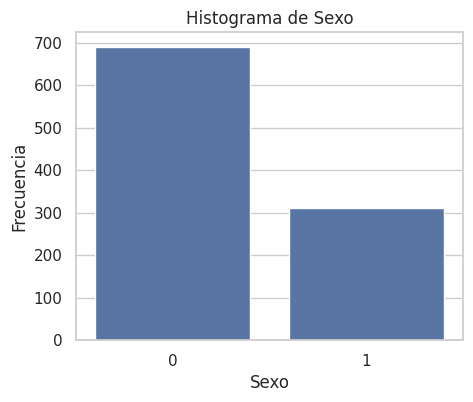

In [16]:
# Configurar el estilo de Seaborn (opcional)
sns.set(style="whitegrid")

# Crear el histograma utilizando Seaborn
plt.figure(figsize=(5, 4))
sns.countplot(data=df_banco, x='sexo')
plt.title('Histograma de Sexo')
plt.xlabel('Sexo')
plt.ylabel('Frecuencia')

# Mostrar el histograma
plt.show()

In [17]:
def analisis_exploratorio():
  global df_banco
  histogramas = ['sexo','estado_civil','rango_plazos_credito','rango_edad','default']
  lista_histogramas = list(enumerate(histogramas))
  plt.figure(figsize = (30,20))
  plt.title('Histogramas')
  for i in lista_histogramas:
    plt.subplot(3, 2, i[0]+1)
    sns.countplot(x = i[1], data = df_banco)
    plt.xlabel(i[1], fontsize=20)
    plt.ylabel('Total', fontsize=20)

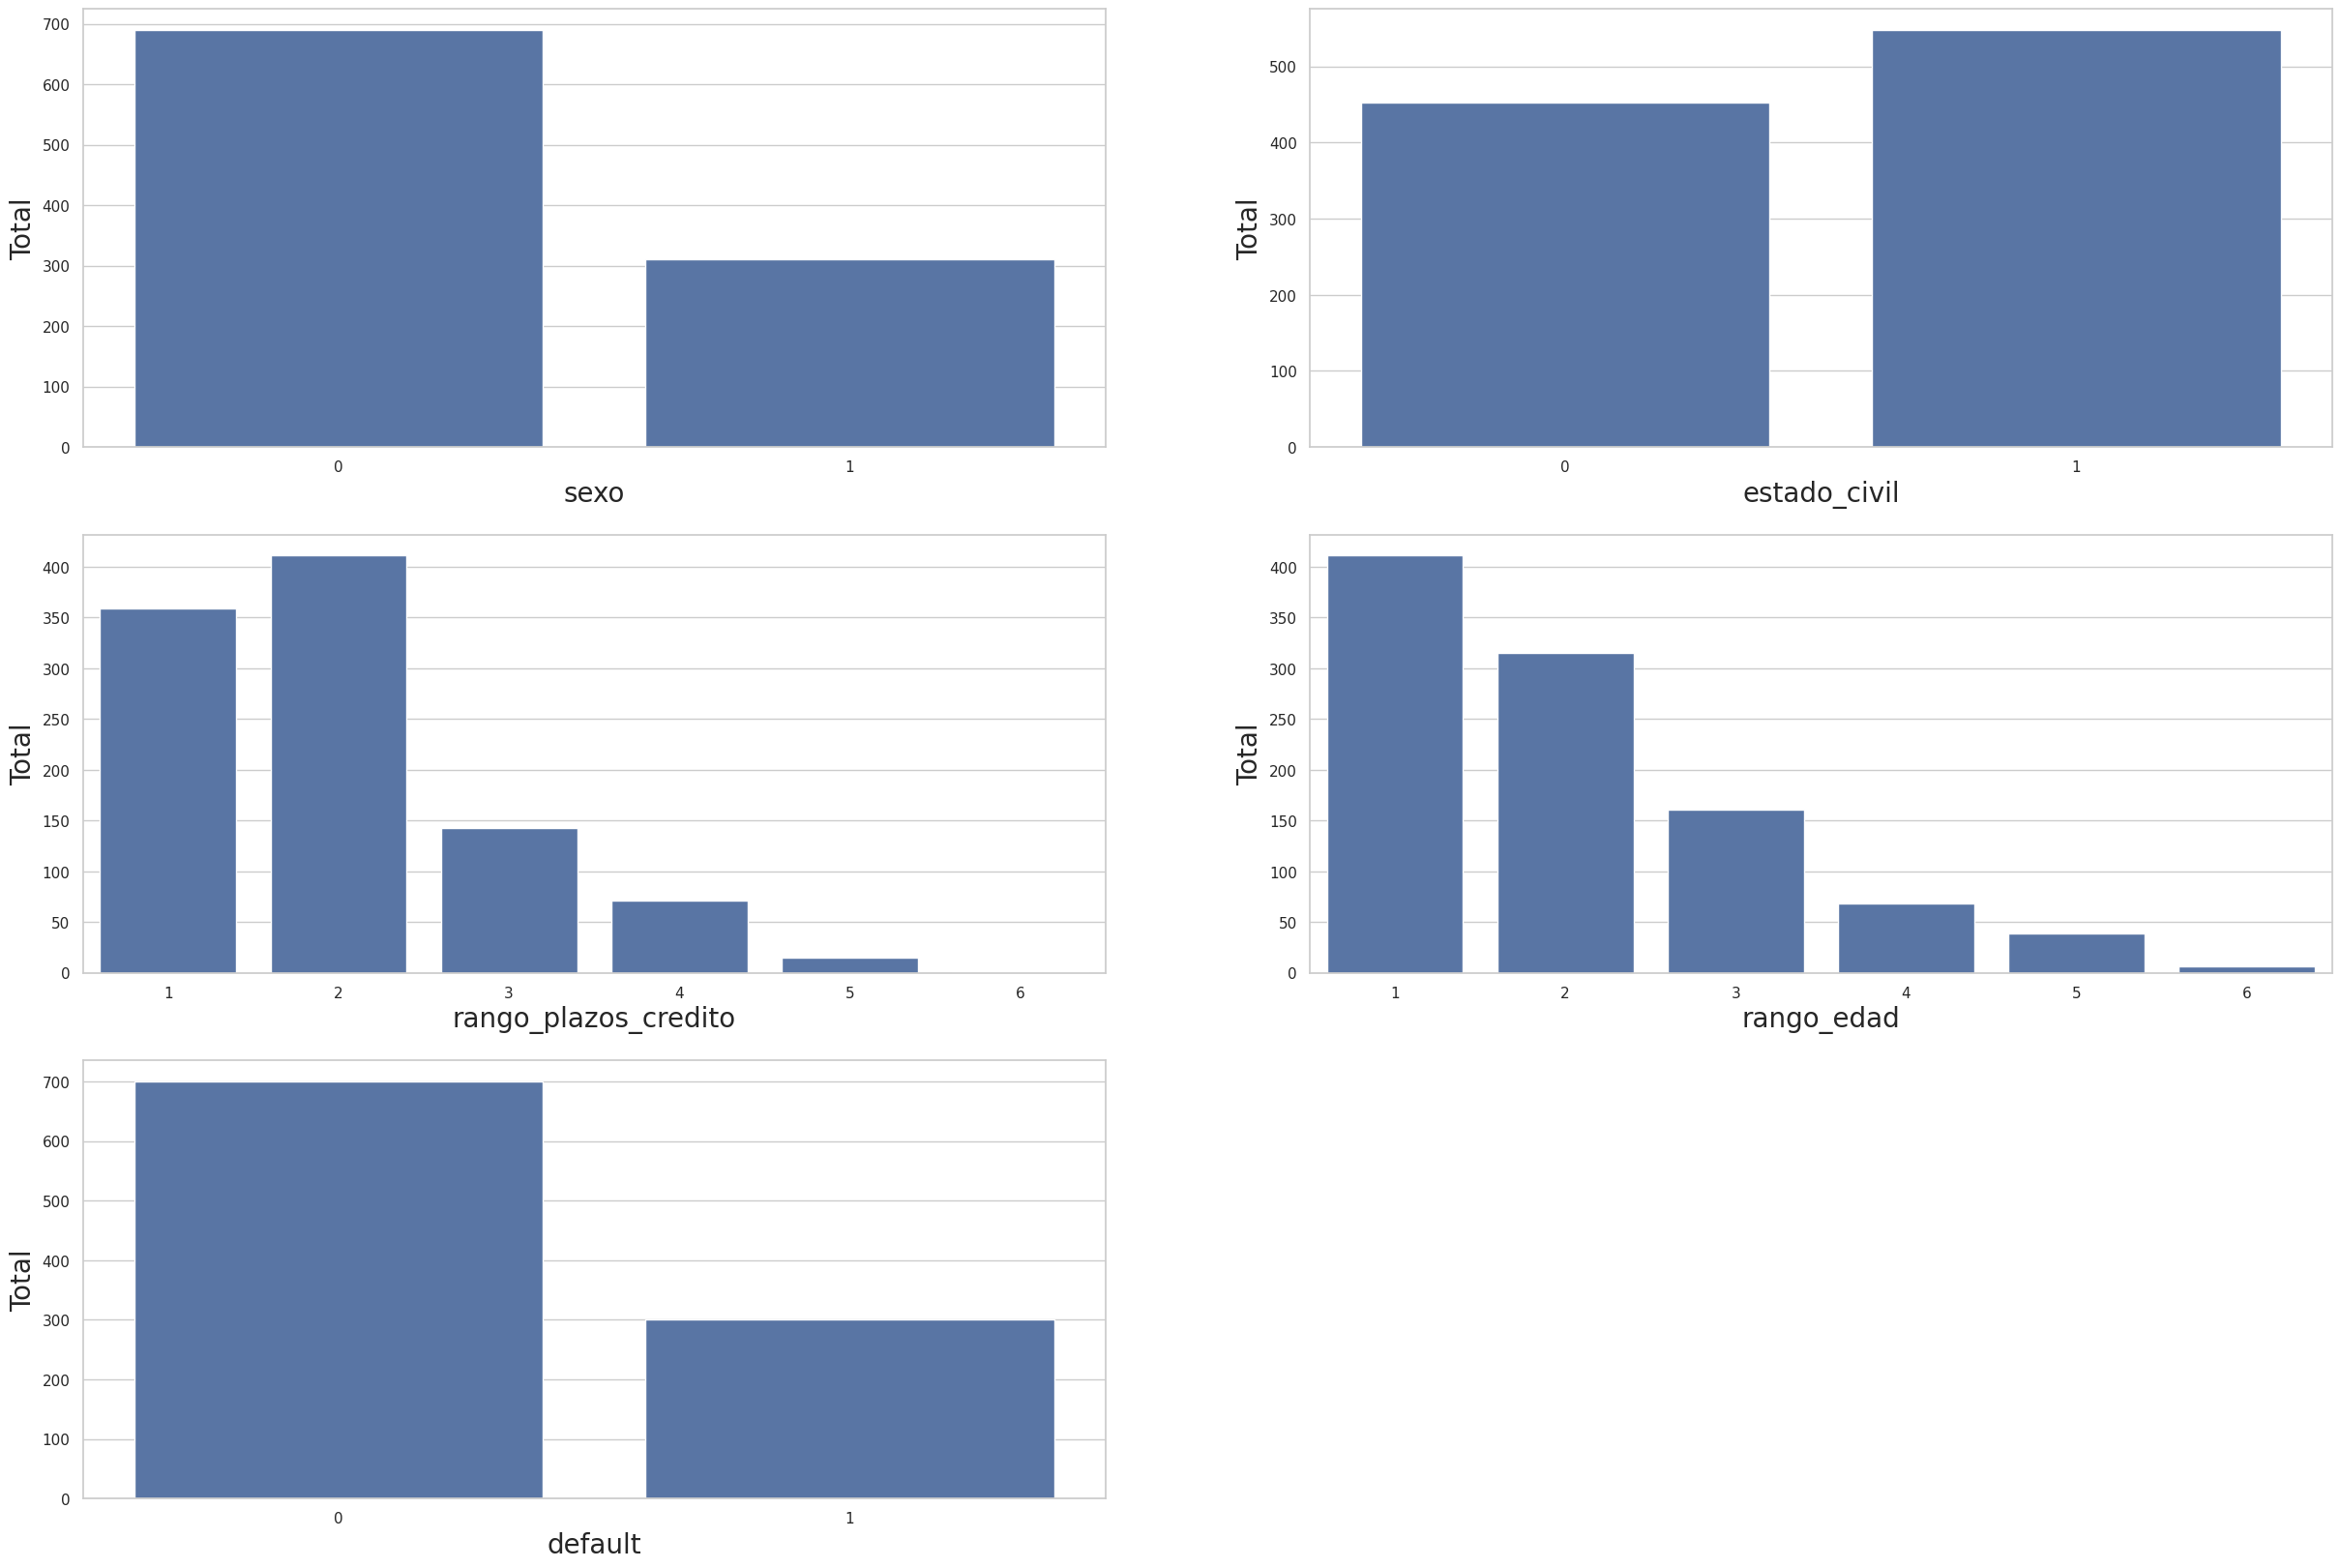

In [18]:
analisis_exploratorio()

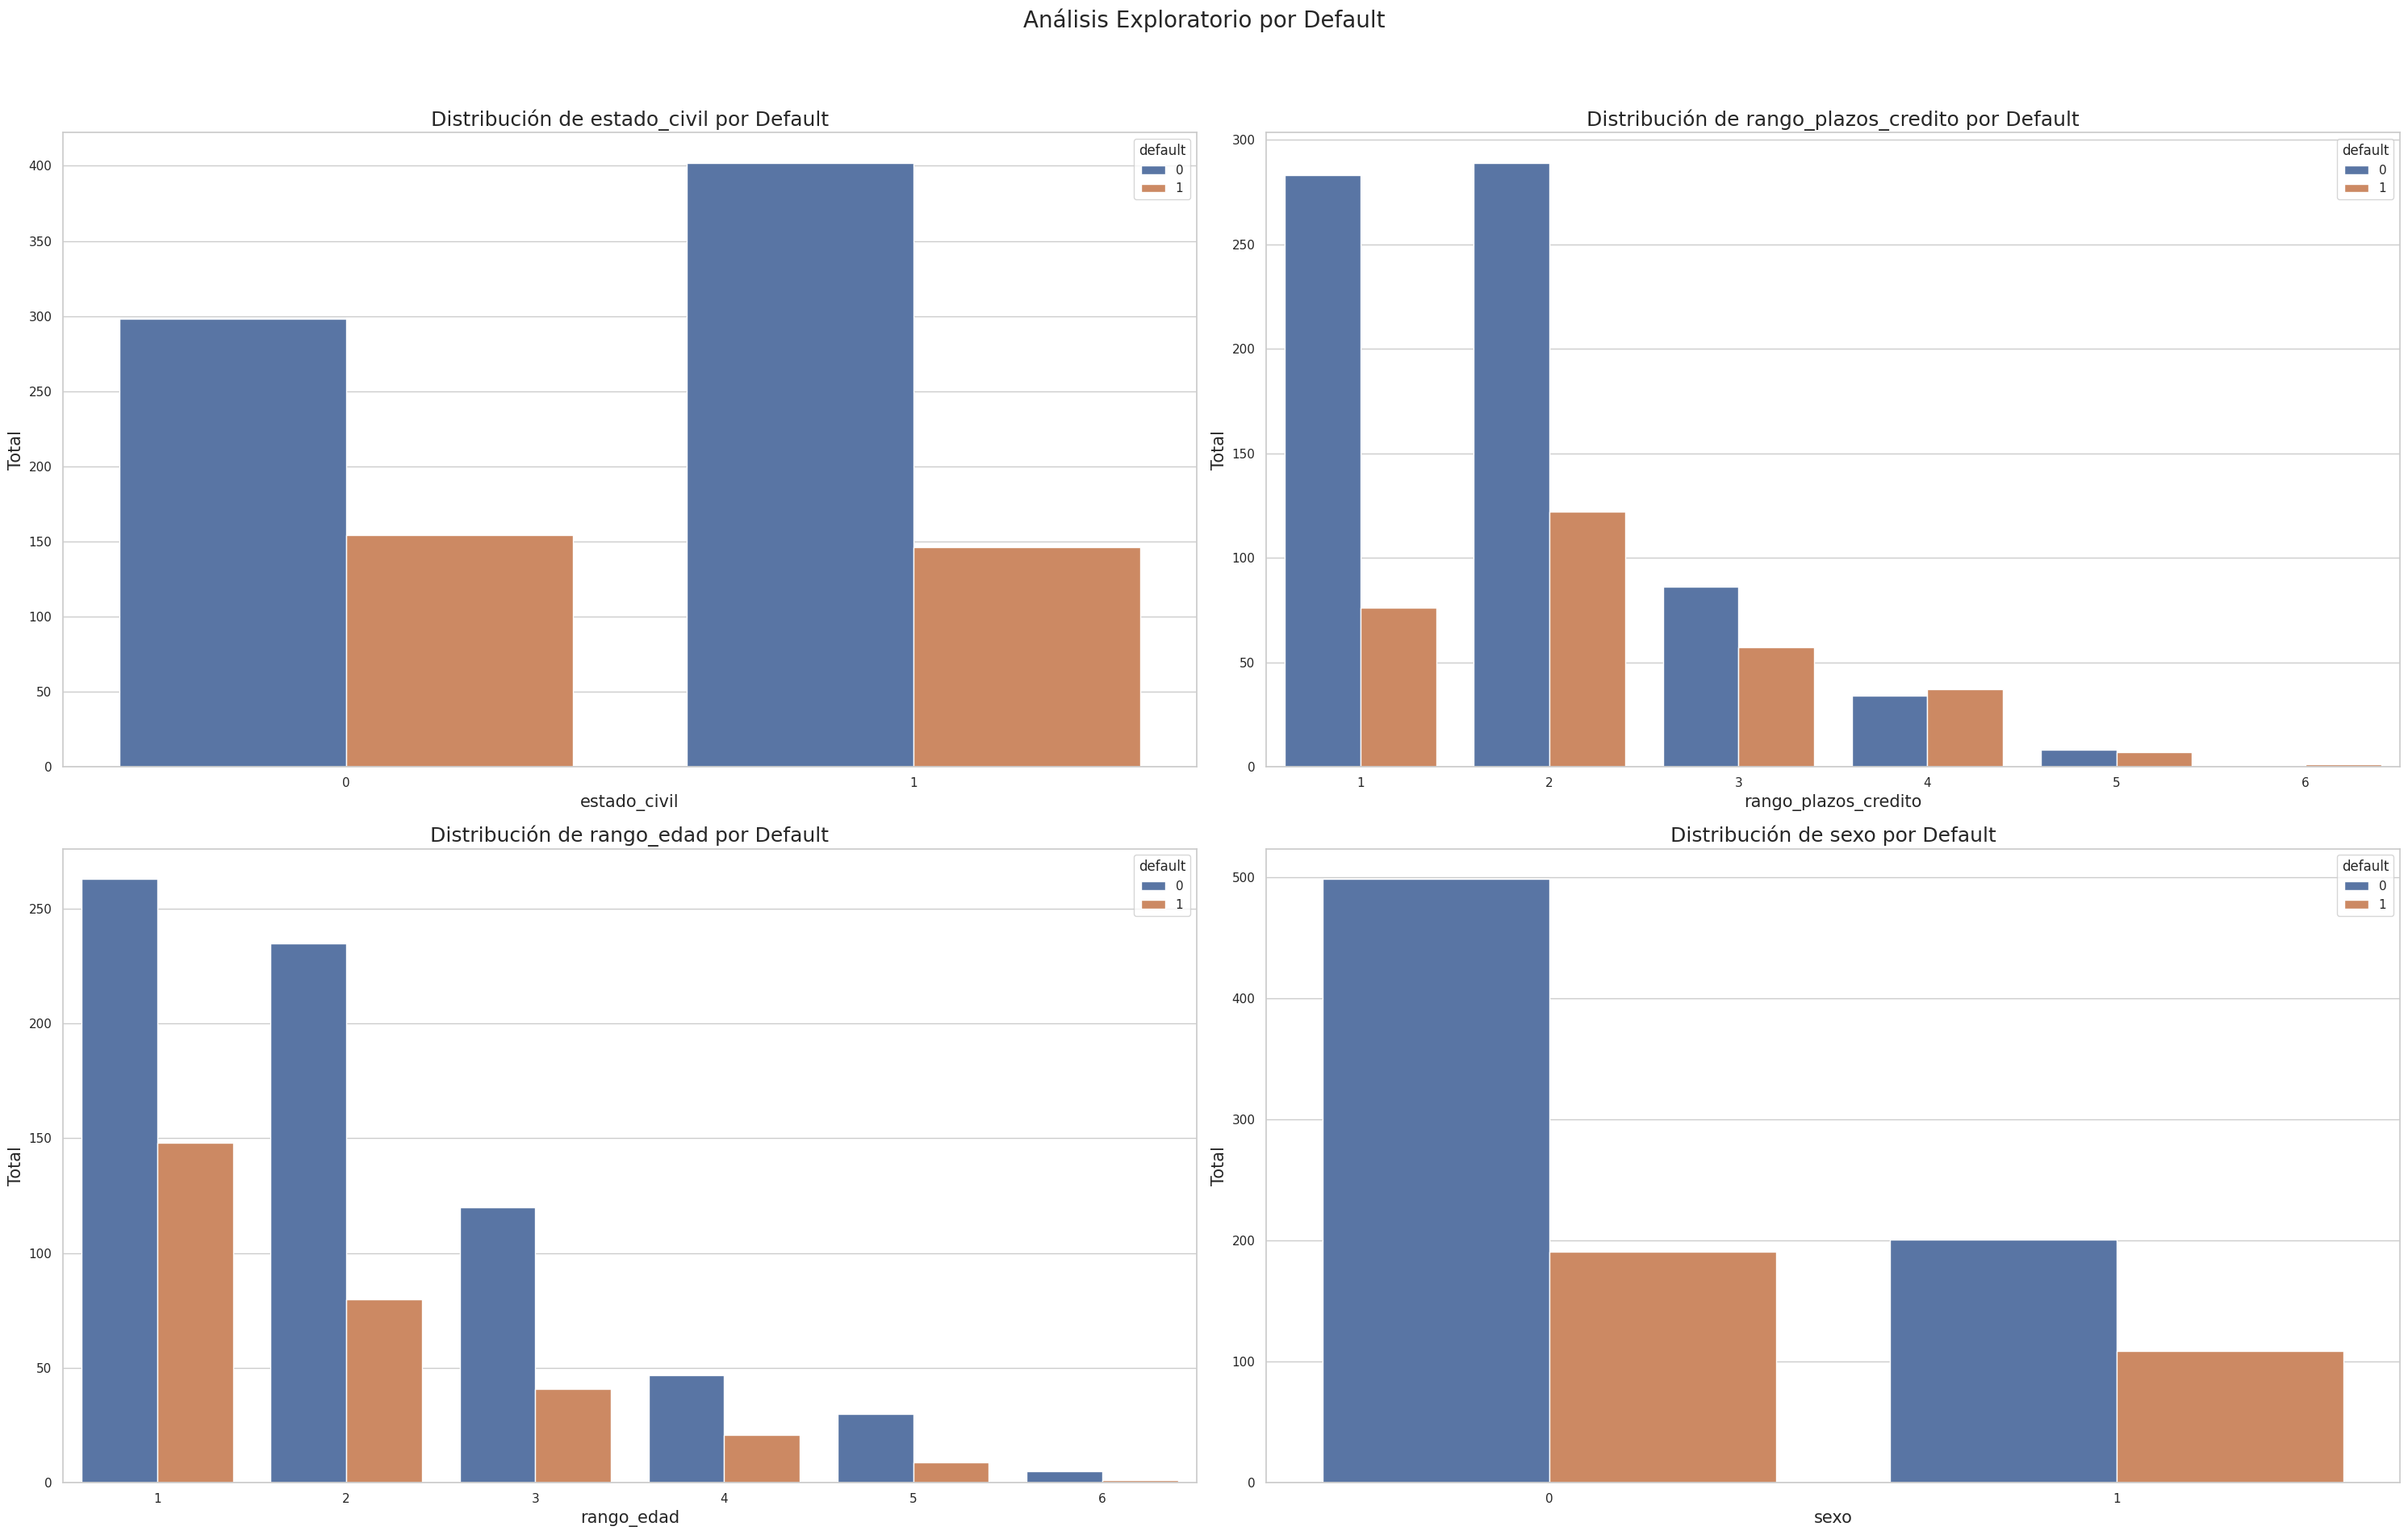

In [33]:
# prompt: # prompt: realiza la función análisis exploratorio por default, para las variables estado_civil, rango_plazos_credito, rango_edad, sexo

import matplotlib.pyplot as plt
def analisis_exploratorio_por_default():
  global df_banco
  variables = ['estado_civil', 'rango_plazos_credito', 'rango_edad', 'sexo']
  lista_variables = list(enumerate(variables))
  plt.figure(figsize=(30, 20))
  plt.suptitle('Análisis Exploratorio por Default', fontsize=20)

  for i in lista_variables:
    plt.subplot(2, 2, i[0]+1)
    sns.countplot(data=df_banco, x=i[1], hue='default')
    plt.xlabel(i[1], fontsize=15)
    plt.ylabel('Total', fontsize=15)
    plt.title(f'Distribución de {i[1]} por Default', fontsize=18)

  plt.tight_layout(rect=[0, 0.03, 1, 0.95])
  plt.show()

analisis_exploratorio_por_default()


A partir de estos histogramas, se pueden realizar las siguientes conclusiones preliminares:


*   Las mujeres representan menor riesgo al momento de solicitar un crédito.
*   Rango de plazo de créditos más cortos, tienen mayor probabilidad de ser pagados.
*   La mayoría de los créditos son adquiridos por jóvenes. Esto sugiere que con mayor edad, hay menor probabilidad de obtener un crédito.



## Desafíos

1. Analizar los datos de las distribuciones e identificar si hay algún valor o registros que no se deben considerar para el modelo.
2. Investigar qué es y como crear un mapa de calor para analizar la correlación de las variables.
3. Crear una conclusión para cada uno de los gráficos del histograma. Mirar los datos y extraer conclusiones, porque es una habilidad esencial.

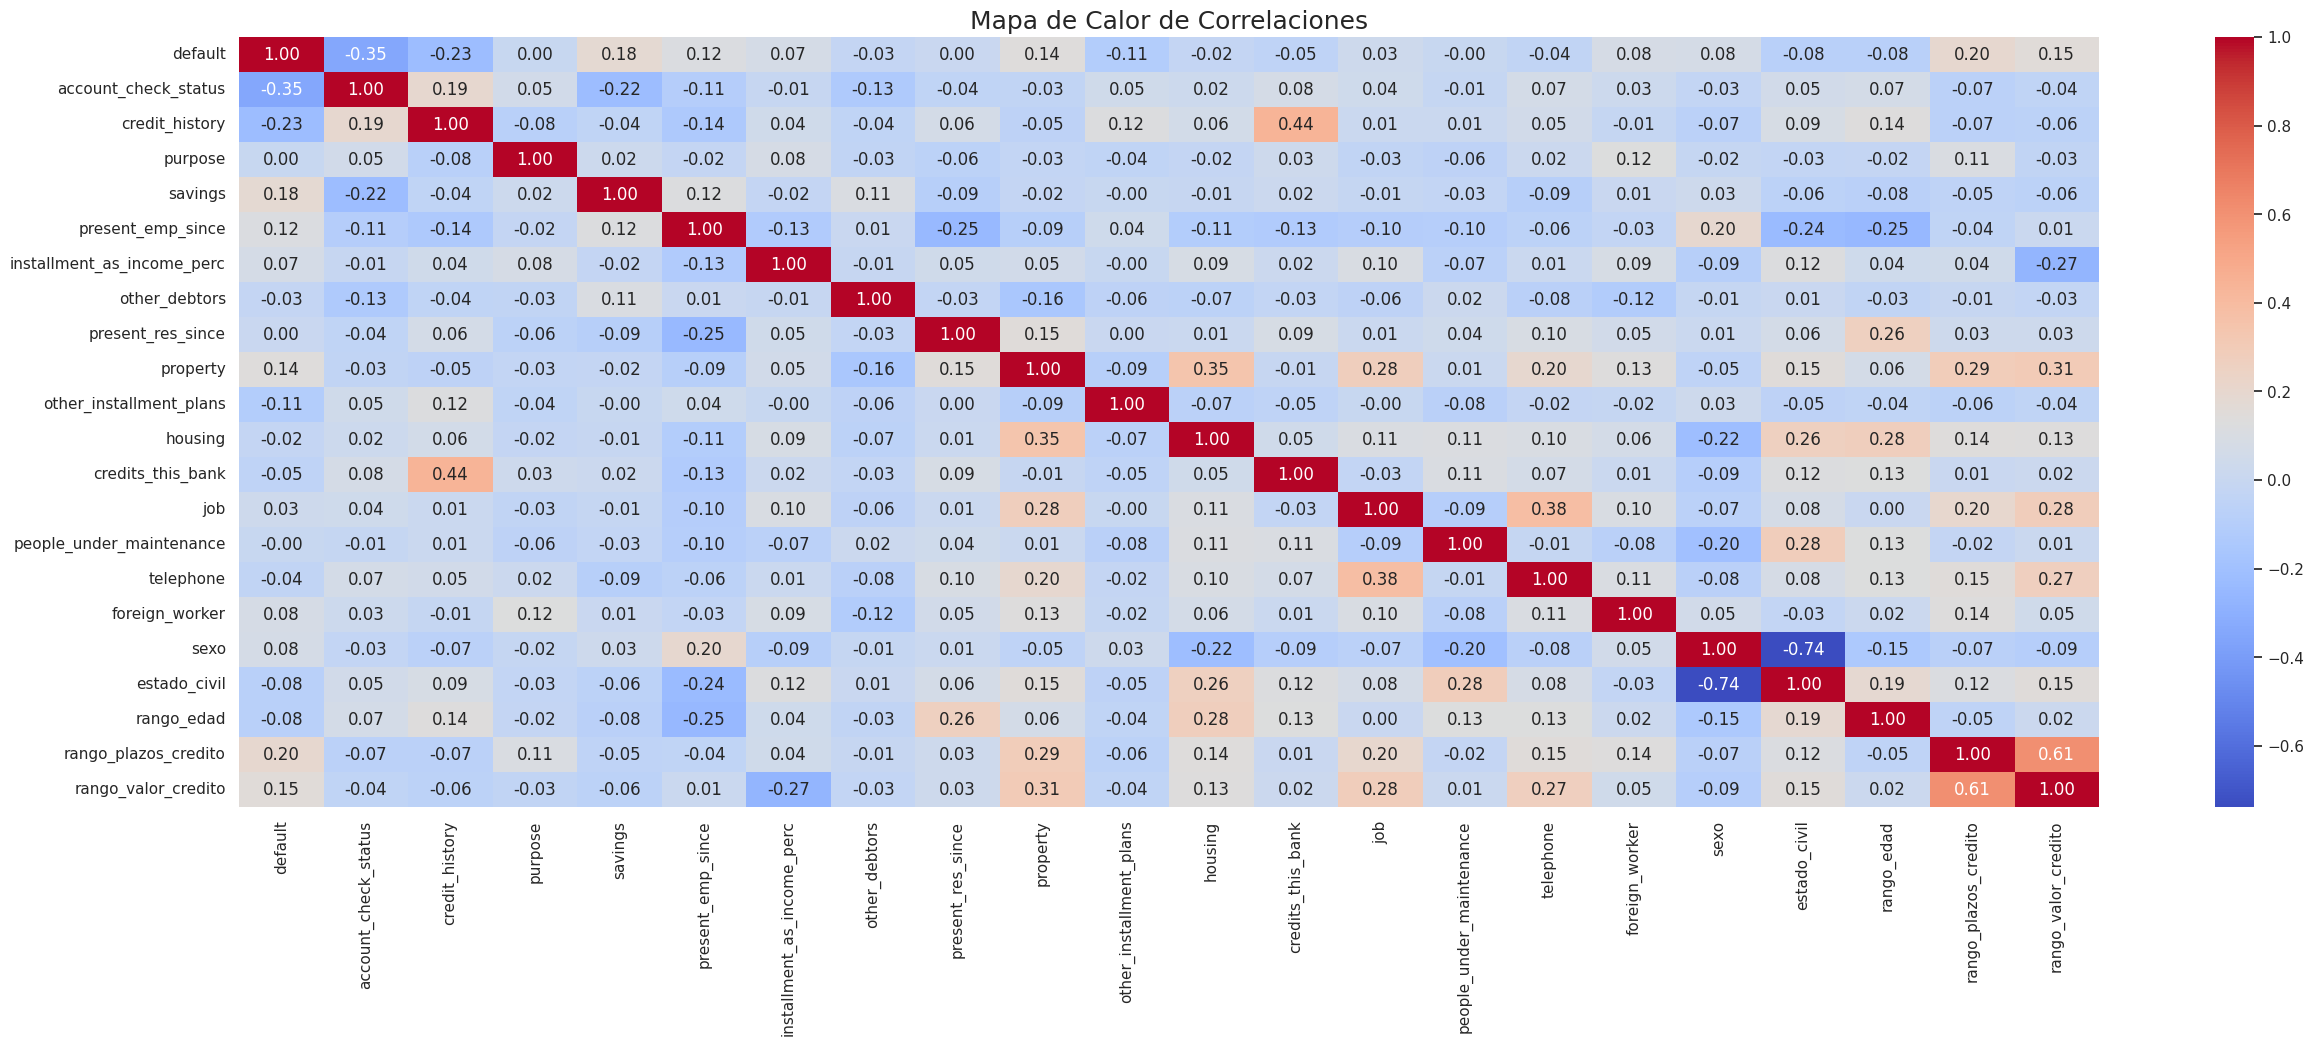

In [19]:
plt.figure(figsize=(30,10))
heatmap = sns.heatmap(df_banco.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Mapa de Calor de Correlaciones', fontsize=18)
plt.show()

rango_valor_credito   rango_plazos_credito    0.610987
rango_plazos_credito  rango_valor_credito     0.610987
credits_this_bank     credit_history          0.437066
credit_history        credits_this_bank       0.437066
job                   telephone               0.383022
telephone             job                     0.383022
housing               property                0.345219
property              housing                 0.345219
                      rango_valor_credito     0.305677
rango_valor_credito   property                0.305677
dtype: float64


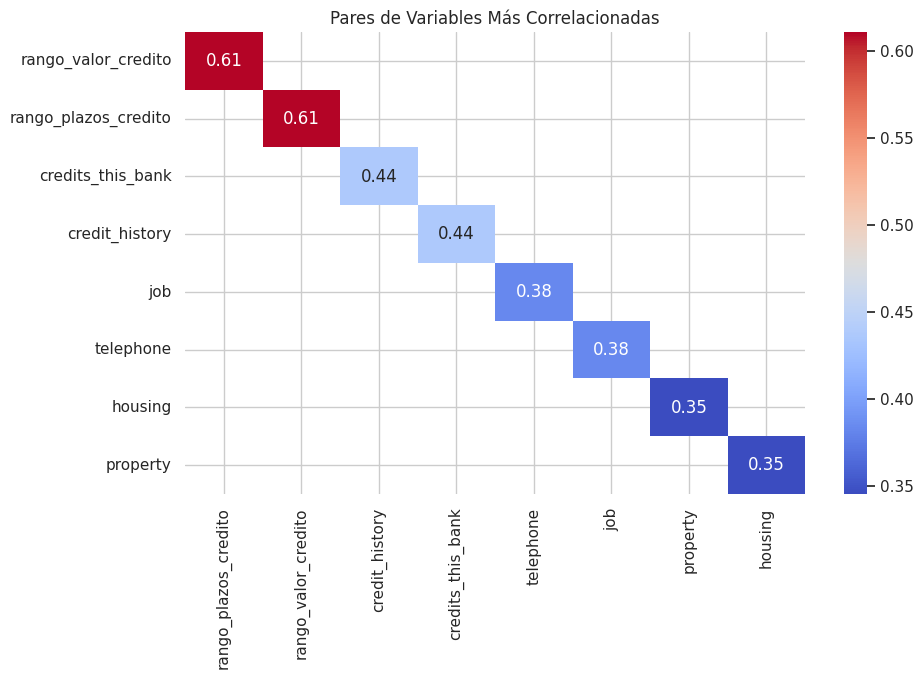

In [52]:
# prompt: Genera un gráfico donde se encuentren los pares de variables mas correlacionadas entre si

# Calcula la matriz de correlación
correlation_matrix = df_banco.corr()

# Encuentra los pares de variables más correlacionadas
top_correlations = correlation_matrix.unstack().sort_values(ascending=False)
top_correlations = top_correlations[top_correlations != 1]  # Elimina autocorrelaciones

# Muestra los pares más correlacionados
print(top_correlations.head(10))

# Grafica las correlaciones más altas
plt.figure(figsize=(10, 6))
sns.heatmap(top_correlations.head(8).unstack(), annot=True, cmap='coolwarm')
plt.title('Pares de Variables Más Correlacionadas')
plt.show()


estado_civil                sexo                         -0.738036
sexo                        estado_civil                 -0.738036
default                     account_check_status         -0.350847
account_check_status        default                      -0.350847
rango_valor_credito         installment_as_income_perc   -0.269688
installment_as_income_perc  rango_valor_credito          -0.269688
present_emp_since           rango_edad                   -0.254865
rango_edad                  present_emp_since            -0.254865
present_emp_since           present_res_since            -0.245081
present_res_since           present_emp_since            -0.245081
dtype: float64


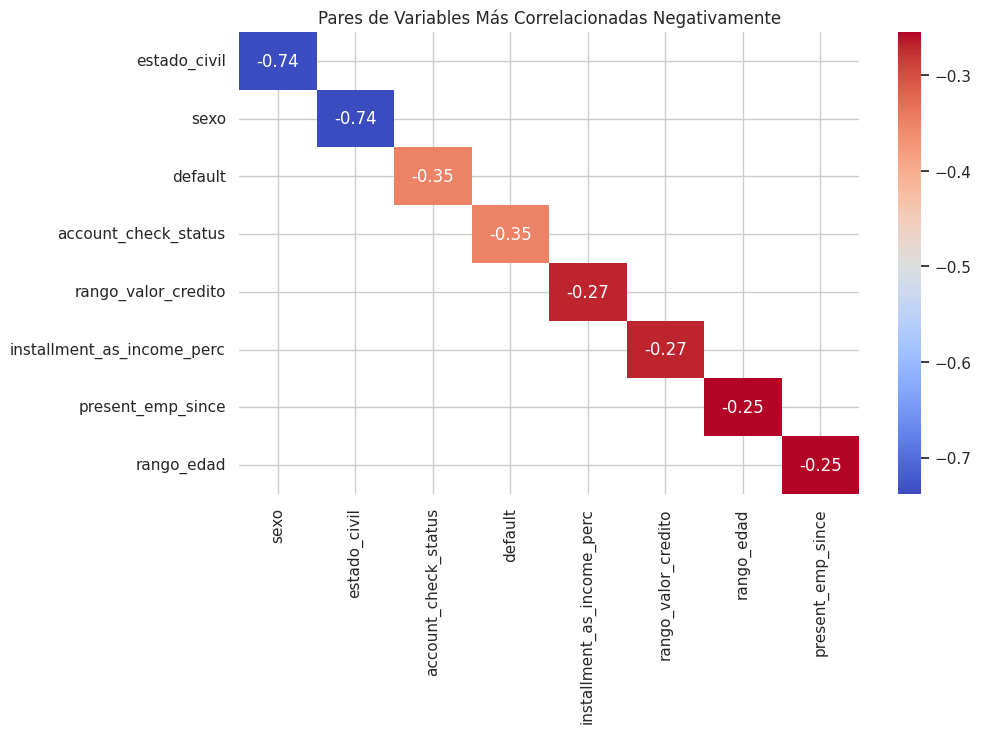

In [51]:
# prompt: Genera un gráfico donde se encuentren los pares de variables mas correlacionadas entre si (negativamente)

# Calcula la matriz de correlación
correlation_matrix = df_banco.corr()

# Encuentra los pares de variables más correlacionadas negativamente
bottom_correlations = correlation_matrix.unstack().sort_values()
bottom_correlations = bottom_correlations[bottom_correlations != 1]  # Elimina autocorrelaciones

# Muestra los pares más correlacionados negativamente
print(bottom_correlations.head(10))

# Grafica las correlaciones más bajas
plt.figure(figsize=(10, 6))
sns.heatmap(bottom_correlations.head(8).unstack(), annot=True, cmap='coolwarm')
plt.title('Pares de Variables Más Correlacionadas Negativamente')
plt.show()


#**4. Construcción de modelos**

In [20]:
# prompt: importar las siguientes bibliotecas: train_test_split, LogisticRegression, DecisionTreeClassifier, RandomForestClassifier, GaussianNB, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve


In [21]:
# prompt: por favor, genera un ejemplo de modelo de machine learning de clasificacion en python

# Dividir los datos en conjuntos de entrenamiento y prueba
X = df_banco.drop('default', axis=1)
y = df_banco['default']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear y entrenar un modelo de regresión logística
model = LogisticRegression()
model.fit(X_train, y_train)

# Hacer predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
print("Precisión del modelo:", accuracy)


Precisión del modelo: 0.795


In [22]:
#@title
def crea_modelos():
  global df_banco, resultados
  y = df_banco['default']
  x = df_banco.drop(columns='default')
  train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.30, random_state = 77)

  models = {
      'Regresión Logística': LogisticRegression(),
      'Árbol de Decisión': DecisionTreeClassifier(),
      'Random Forest': RandomForestClassifier(),
      'Naive Bayes': GaussianNB()
  }

  results = {'Model': [], 'Accuracy': [], 'Precision': [], 'Recall': [], 'F1-score': [], 'AUC-ROC': []}

  for name, model in models.items():
      model.fit(train_x, train_y)
      predictions = model.predict(test_x)
      accuracy = accuracy_score(test_y, predictions)
      precision = precision_score(test_y, predictions)
      recall = recall_score(test_y, predictions)
      f1 = f1_score(test_y, predictions)
      if hasattr(model, "predict_proba"):
          proba = model.predict_proba(test_x)
          roc_auc = roc_auc_score(test_y, proba[:, 1])
      else:
          roc_auc = None

      results['Model'].append(name)
      results['Accuracy'].append(accuracy)
      results['Precision'].append(precision)
      results['Recall'].append(recall)
      results['F1-score'].append(f1)
      results['AUC-ROC'].append(roc_auc)

  resultados = results

In [23]:
crea_modelos()
for i,model in enumerate(resultados['Model']):
  print(model)
  print(resultados['Accuracy'][i])
  print(resultados['Precision'][i])
  print(resultados['Recall'][i])
  print(resultados['F1-score'][i])
  print(resultados['AUC-ROC'][i])
  print('\n')

Regresión Logística
0.78
0.6785714285714286
0.4418604651162791
0.5352112676056338
0.799934796783308


Árbol de Decisión
0.71
0.4936708860759494
0.45348837209302323
0.4727272727272727
0.6332862421212779


Random Forest
0.7966666666666666
0.7358490566037735
0.45348837209302323
0.5611510791366905
0.7985220604216475


Naive Bayes
0.74
0.5465116279069767
0.5465116279069767
0.5465116279069767
0.7800478156922409




#**5. Evaluación y selección del modelo**

In [24]:
#@title
def visualiza_resultados():
  global df_banco, resultados
  results_df = pd.DataFrame(resultados)
  results_df.set_index('Model', inplace=True)

  # Transponer el DataFrame para facilitar la representación
  results_df = results_df.T
  colors = ['#0077b6', '#CDDBF3','#9370DB', '#DDA0DD']

  # Gráfico de barras agrupadas para cada métrica
  results_df.plot(kind='bar', figsize=(12, 6), colormap='viridis', rot=0, color=colors)
  plt.title('Comparación de Métricas por Modelo')
  plt.xlabel('Métricas')
  plt.ylabel('Puntuación')
  plt.legend(title='Modelos')
  plt.tight_layout()
  plt.show()

  # @title Texto de título predeterminado
  from IPython.display import HTML, display


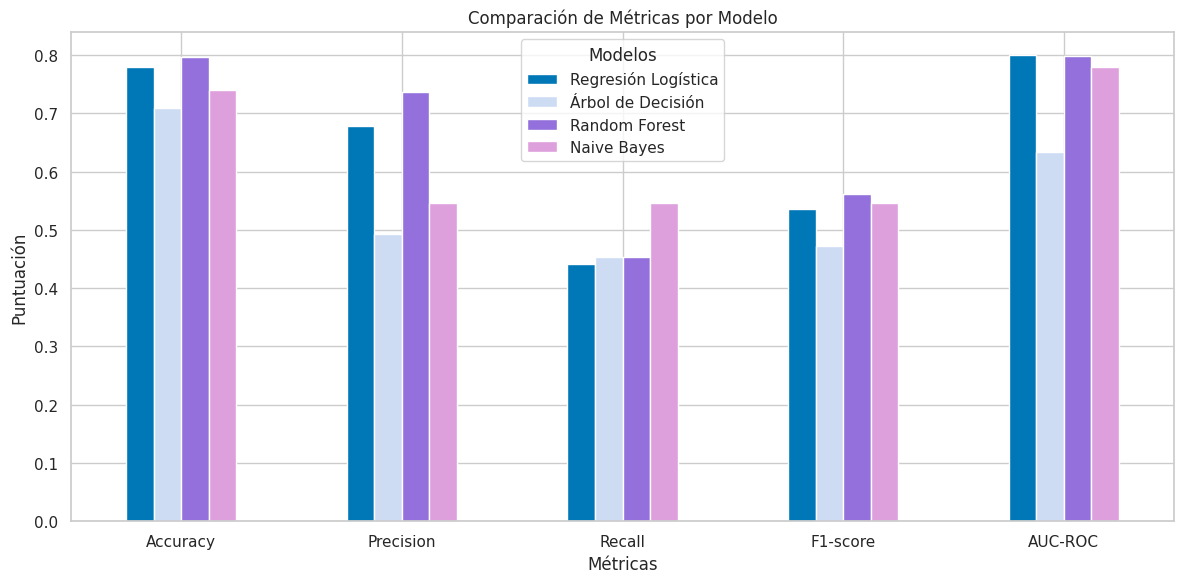

In [25]:
visualiza_resultados()

## Desafíos

1. Evaluar la Matriz de Confusión.
2. Balancear la variable target.
3. Seleccionar sólo algunas variable y reevaluar.

In [26]:
# Importar librería necesaria
from sklearn.metrics import confusion_matrix

In [27]:
def evalua_modelos():
  global df_banco, resultados
  y = df_banco['default']
  x = df_banco.drop(columns='default')
  train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.30, random_state = 77)

  models = {
      'Regresión Logística': LogisticRegression(),
      'Árbol de Decisión': DecisionTreeClassifier(),
      'Random Forest': RandomForestClassifier(),
      'Naive Bayes': GaussianNB()
  }

  for name, model in models.items():
    model.fit(train_x, train_y)
    predictions = model.predict(test_x)
    cm = confusion_matrix(test_y, predictions)

    TN, FP = cm[0]
    FN, TP = cm[1]

    print(f"Matriz de Confusión para {name}:")
    print(f"True Negatives (TN): {TN}")
    print(f"False Positives (FP): {FP}")
    print(f"False Negatives (FN): {FN}")
    print(f"True Positives (TP): {TP}")
    print("\n")

In [28]:
evalua_modelos()

Matriz de Confusión para Regresión Logística:
True Negatives (TN): 196
False Positives (FP): 18
False Negatives (FN): 48
True Positives (TP): 38


Matriz de Confusión para Árbol de Decisión:
True Negatives (TN): 172
False Positives (FP): 42
False Negatives (FN): 50
True Positives (TP): 36


Matriz de Confusión para Random Forest:
True Negatives (TN): 202
False Positives (FP): 12
False Negatives (FN): 52
True Positives (TP): 34


Matriz de Confusión para Naive Bayes:
True Negatives (TN): 175
False Positives (FP): 39
False Negatives (FN): 39
True Positives (TP): 47




Para interpretar los resultados de las matrices de confusión y determinar qué modelo destaca en el contexto del problema de negocio, consideremos los siguientes puntos:


1. True Negatives (TN): Casos correctamente identificados como "malos".
2. False Positives (FP): Casos incorrectamente identificados como "buenos" clientes cuando en realidad son "malos".
3. False Negatives (FN): Casos incorrectamente identificados como "malos" clientes cuando en realidad son "buenos".
4. True Positives (TP): Casos correctamente identificados como "buenos" clientes.

En el presente contexto, los FP y FN son críticos:

* FP (False Positives): Un cliente que se considera "bueno" pero resulta ser "malo" puede resultar en una pérdida financiera.

*  FN (False Negatives): Un cliente que se considera "malo" pero resulta ser "bueno" puede resultar en una oportunidad perdida.

A partir de los resultados, el modelo Random Forest proporciona el mejor rendimiento respecto a los otros modelos. Pues tiene el menor número de Falsos Positivos (14), lo que reduce el riesgo financiero. Por otro lado, posee resultados razonables entre TP y FN.



A continuación, observamos la cantidad de ejemplos por cada valor de la variable target (default). De esta manera, podemos determinar si es necesario realizar un balance de esta variable.

In [29]:
# Verificar el balance de la variable objetivo
target_counts = df_banco['default'].value_counts()
print(target_counts)

# Calcular el porcentaje de cada clase
target_percentage = target_counts / target_counts.sum() * 100
print(target_percentage)


default
0    700
1    300
Name: count, dtype: int64
default
0    70.0
1    30.0
Name: count, dtype: float64


La base de datos se encuentra desbalanceada, lo que puede influir en el rendimiento de los modelos. A continuación, se aplica oversampling a la variable target.

In [30]:
from imblearn.over_sampling import RandomOverSampler

# Inicializar RandomOverSampler
oversampler = RandomOverSampler(random_state=42)

# Aplicar oversampling a los datos
X_resampled, y_resampled = oversampler.fit_resample(X, y)

# Crear un nuevo DataFrame con los datos balanceados
df_balanced = pd.DataFrame(X_resampled, columns=X.columns)
df_balanced['default'] = y_resampled

# Verificar el balance de la variable objetivo después del oversampling
balanced_target_counts = df_balanced['default'].value_counts()
print(balanced_target_counts)

# Calcular el porcentaje de cada clase después del oversampling
balanced_target_percentage = balanced_target_counts / balanced_target_counts.sum() * 100
print(balanced_target_percentage)


default
0    700
1    700
Name: count, dtype: int64
default
0    50.0
1    50.0
Name: count, dtype: float64


A partir del Mapa de Calor de Correlación, las variables que más se relacionan con la calificación realizada en default son:


*   savings (Ahorro)
*   rango_plazos_crédito (Plazo del crédito)
*   property (Propiedad)
*   rango_valor_crédito (Valor del crédito)




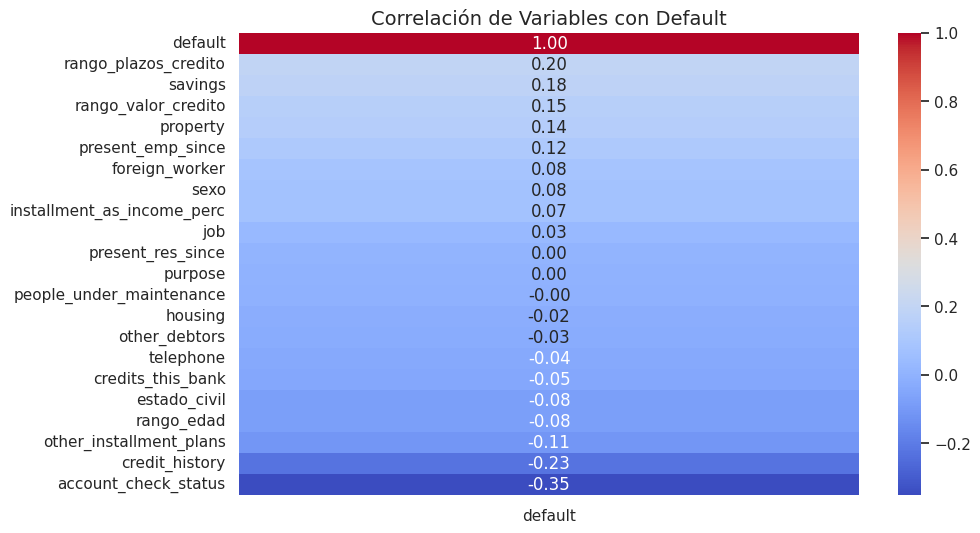

In [31]:
# prompt: Realiza un gráfico de callor donde compares todas las variables con default para observar su correlación

import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
sns.heatmap(df_banco.corr()[['default']].sort_values(by='default', ascending=False), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlación de Variables con Default', fontsize=14)
plt.show()


In [41]:
crea_modelos()

In [42]:
crea_modelos()
for i,model in enumerate(resultados['Model']):
  print(model)
  print(resultados['Accuracy'][i])
  print(resultados['Precision'][i])
  print(resultados['Recall'][i])
  print(resultados['F1-score'][i])
  print(resultados['AUC-ROC'][i])
  print('\n')

Regresión Logística
0.78
0.6785714285714286
0.4418604651162791
0.5352112676056338
0.799934796783308


Árbol de Decisión
0.7066666666666667
0.4868421052631579
0.43023255813953487
0.45679012345679015
0.6239947837426646


Random Forest
0.7933333333333333
0.75
0.4186046511627907
0.5373134328358209
0.7815963920886764


Naive Bayes
0.74
0.5465116279069767
0.5465116279069767
0.5465116279069767
0.7800478156922409




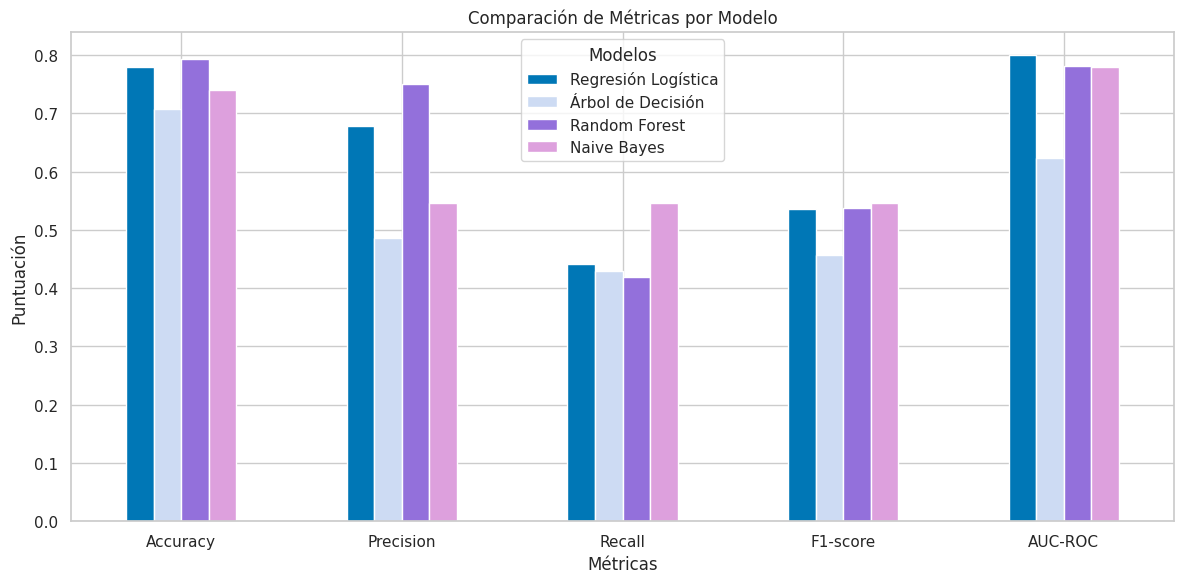

In [43]:
visualiza_resultados()